In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from scipy.sparse import linalg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF

## Part 1

In [30]:
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']


In [31]:
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))

In [32]:
stop_words = text.ENGLISH_STOP_WORDS


In [33]:
labels = (dataset.target[:] >= 4) * 1

In [34]:
count_vect = CountVectorizer(analyzer='word', min_df=3, stop_words=stop_words)
Data_counts = count_vect.fit_transform(dataset.data)

In [35]:
tfidf_transformer = TfidfTransformer()
Data_tfidf = tfidf_transformer.fit_transform(Data_counts)
print(Data_tfidf.shape)

(7882, 18469)


## Part 2

In [8]:
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=1)
k_means.fit(Data_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [9]:
print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))

labels_2 = (dataset.target[:] < 4) * 1
print('Contingency Matrix: ', confusion_matrix(labels_2, k_means.labels_))

Homogeneity:  0.364087707357
Completeness:  0.401294286754
V-measure:  0.381786658071
Adjusted Rand-Index:  0.36309558238
Adjusted Mutual-Index:  0.364029487281
Contingency Matrix:  [[  65 3838]
 [2478 1501]]
Contingency Matrix:  [[2478 1501]
 [  65 3838]]


## Part 3

In [10]:
Data_tfidf_transpose = np.transpose(Data_tfidf)
x = np.matmul(Data_tfidf.toarray(), Data_tfidf_transpose.toarray())
total_variance = np.matrix.trace(x)

### Part A

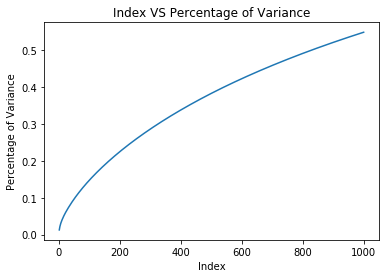

In [11]:
u, singular_values, vt = linalg.svds(Data_tfidf, 1000)
singular_values = singular_values[::-1]
singular_values_squared = np.square(singular_values)
sum_of_singular_squared_values = np.zeros(len(singular_values_squared))
for a in range(len(singular_values_squared)):
    sum_of_singular_squared_values[a] = np.sum(singular_values_squared[0:a + 1:1])

singular_values_percentage = np.zeros(len(sum_of_singular_squared_values))
for a in range(len(sum_of_singular_squared_values)):
    singular_values_percentage[a] = sum_of_singular_squared_values[a] / total_variance
plt.figure(1)
plt.plot(range(1, 1001), singular_values_percentage)
plt.xlabel('Index')
plt.ylabel('Percentage of Variance')
plt.title('Index VS Percentage of Variance')
plt.show()

### Part B

SVD Computations Starting...
Number of components: 1
Homogeneity:  0.060815390048
Completeness:  0.0618672085677
V-measure:  0.061336790428
Adjusted Rand-Index:  0.081807139568
Adjusted Mutual-Index:  0.0607294069086
Contingency Matrix:  [[1690 2213]
 [2856 1123]]
Number of components: 2
Homogeneity:  0.415423960897
Completeness:  0.449810339578
V-measure:  0.431933853795
Adjusted Rand-Index:  0.432834606981
Adjusted Mutual-Index:  0.415370441217
Contingency Matrix:  [[1291 2612]
 [3922   57]]
Number of components: 3
Homogeneity:  0.41689740228
Completeness:  0.450632712865
V-measure:  0.433109131536
Adjusted Rand-Index:  0.435845275329
Adjusted Mutual-Index:  0.416844017534
Contingency Matrix:  [[1280 2623]
 [3920   59]]
Number of components: 5
Homogeneity:  0.0524666434717
Completeness:  0.156609460567
V-measure:  0.0786007829029
Adjusted Rand-Index:  0.0156130714971
Adjusted Mutual-Index:  0.0523798235673
Contingency Matrix:  [[3431  472]
 [3963   16]]
Number of components: 10
Homog

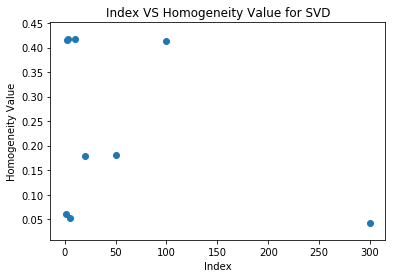

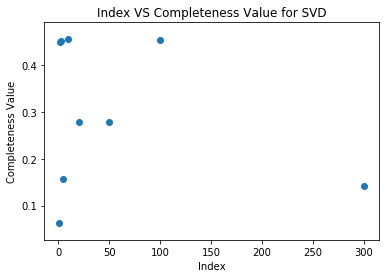

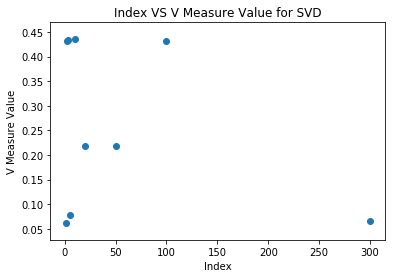

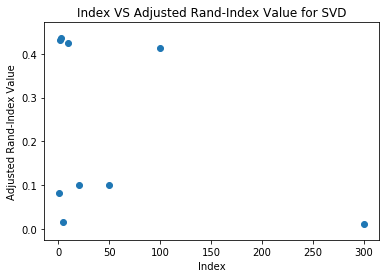

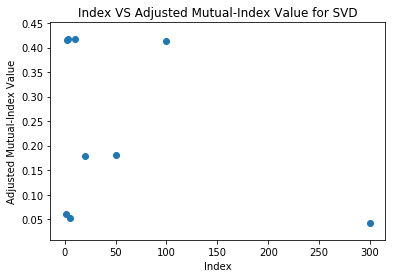

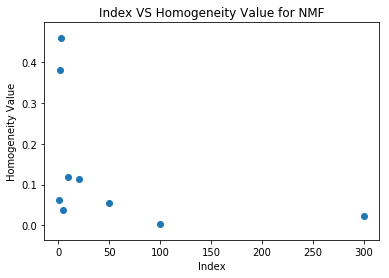

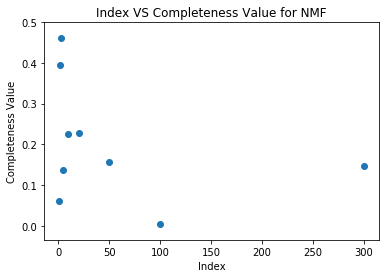

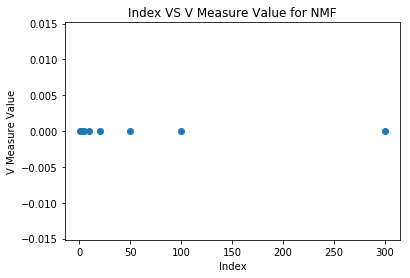

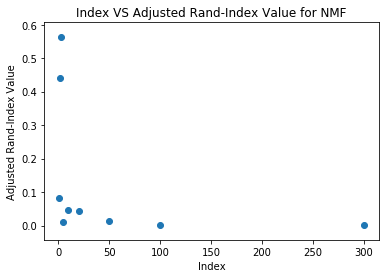

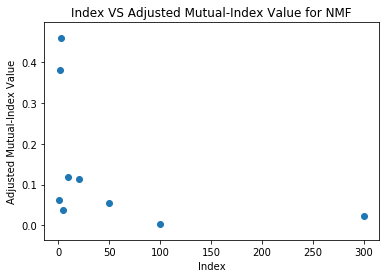

In [12]:
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=1)
r_values = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_svd = np.zeros(len(r_values))
completeness_svd = np.zeros(len(r_values))
v_measure_svd = np.zeros(len(r_values))
rand_index_svd = np.zeros(len(r_values))
mutual_index_svd = np.zeros(len(r_values))
print('SVD Computations Starting...')
index = 0
for i in r_values:
    svd = TruncatedSVD(n_components=i, random_state=42)
    trauncated_tfidf = svd.fit_transform(Data_tfidf)
    print("Number of components: %d" % i)
    k_means.fit(trauncated_tfidf)
    print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
    homogeneity_svd[index] = metrics.homogeneity_score(labels, k_means.labels_)
    print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
    completeness_svd[index] = metrics.completeness_score(labels, k_means.labels_)
    print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
    v_measure_svd[index] = metrics.v_measure_score(labels, k_means.labels_)
    print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
    rand_index_svd[index] = metrics.adjusted_rand_score(labels, k_means.labels_)
    print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
    mutual_index_svd[index] = metrics.adjusted_mutual_info_score(labels, k_means.labels_)
    print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))
    index += 1

plt.figure(2)
plt.scatter(r_values, homogeneity_svd)
plt.xlabel('Index')
plt.ylabel('Homogeneity Value')
plt.title('Index VS Homogeneity Value for SVD')
plt.figure(3)
plt.scatter(r_values, completeness_svd)
plt.xlabel('Index')
plt.ylabel('Completeness Value')
plt.title('Index VS Completeness Value for SVD')
plt.figure(4)
plt.scatter(r_values, v_measure_svd)
plt.xlabel('Index')
plt.ylabel('V Measure Value')
plt.title('Index VS V Measure Value for SVD')
plt.figure(5)
plt.scatter(r_values, rand_index_svd)
plt.xlabel('Index')
plt.ylabel('Adjusted Rand-Index Value')
plt.title('Index VS Adjusted Rand-Index Value for SVD')
plt.figure(6)
plt.scatter(r_values, mutual_index_svd)
plt.xlabel('Index')
plt.ylabel('Adjusted Mutual-Index Value')
plt.title('Index VS Adjusted Mutual-Index Value for SVD')


# NMF
print('NMF Computations Starting....')
homogeneity_nmf = np.zeros(len(r_values))
completeness_nmf = np.zeros(len(r_values))
v_measure_nmf = np.zeros(len(r_values))
rand_index_nmf = np.zeros(len(r_values))
mutual_index_nmf = np.zeros(len(r_values))
index = 0
for i in r_values:
    nmf = NMF(n_components=i, init='random', random_state=42)
    nmf_tfidf = nmf.fit_transform(Data_tfidf)
    print("Number of components: %d" % i)
    k_means.fit(nmf_tfidf)
    print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
    homogeneity_nmf[index] = metrics.homogeneity_score(labels, k_means.labels_)
    print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
    completeness_nmf[index] = metrics.completeness_score(labels, k_means.labels_)
    print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
    v_measure_svd[index] = metrics.v_measure_score(labels, k_means.labels_)
    print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
    rand_index_nmf[index] = metrics.adjusted_rand_score(labels, k_means.labels_)
    print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
    mutual_index_nmf[index] = metrics.adjusted_mutual_info_score(labels, k_means.labels_)
    print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))
    index += 1

plt.figure(7)
plt.scatter(r_values, homogeneity_nmf)
plt.xlabel('Index')
plt.ylabel('Homogeneity Value')
plt.title('Index VS Homogeneity Value for NMF')
plt.figure(8)
plt.scatter(r_values, completeness_nmf)
plt.xlabel('Index')
plt.ylabel('Completeness Value')
plt.title('Index VS Completeness Value for NMF')
plt.figure(9)
plt.scatter(r_values, v_measure_nmf)
plt.xlabel('Index')
plt.ylabel('V Measure Value')
plt.title('Index VS V Measure Value for NMF')
plt.figure(10)
plt.scatter(r_values, rand_index_nmf)
plt.xlabel('Index')
plt.ylabel('Adjusted Rand-Index Value')
plt.title('Index VS Adjusted Rand-Index Value for NMF')
plt.figure(11)
plt.scatter(r_values, mutual_index_nmf)
plt.xlabel('Index')
plt.ylabel('Adjusted Mutual-Index Value')
plt.title('Index VS Adjusted Mutual-Index Value for NMF')
plt.show()


## Part 4

### Part A

In [13]:
def plot_main(datapoints, kmean):
    for i in range(datapoints.shape[0]):
        if (labels[i] == 0):
            color = 'r'
        else:
            color = 'b'
        plt.scatter(datapoints[i, 0], datapoints[i, 1], color=color)

    center_of_k_mean = kmean.cluster_centers_
    plt.scatter(center_of_k_mean[:, 0], center_of_k_mean[:, 1], marker='X', s=100, color='w')
    plt.show()

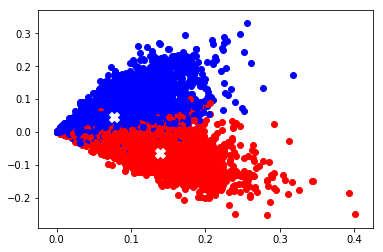

In [14]:
svd = TruncatedSVD(n_components=2, random_state=42)
truncated_tfidf = svd.fit_transform(Data_tfidf)
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=1)
k_means.fit(truncated_tfidf)
plot_main(truncated_tfidf, k_means)

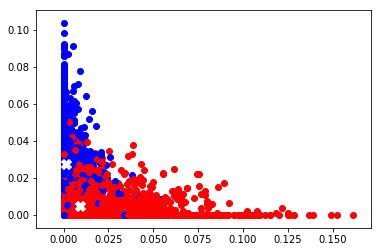

In [39]:
nmf = NMF(n_components=3, init='random', random_state=42)
nmf_tfidf = nmf.fit_transform(Data_tfidf)
k_means_nmf = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=1)
k_means_nmf.fit(nmf_tfidf)
plot_main(nmf_tfidf, k_means_nmf)

### Part B

#### Normalize Data

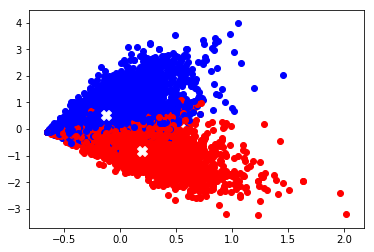

Homogeneity:  0.475905197552
Completeness:  0.494126141691
V-measure:  0.484844539684
Adjusted Rand-Index:  0.533608766189
Adjusted Mutual-Index:  0.475857215875
Contingency Matrix:  [[ 956 2947]
 [3873  106]]


In [16]:
svd = TruncatedSVD(n_components=2, random_state=42, n_iter=13)
x = svd.fit_transform(Data_tfidf)
normalized_x = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
k_means.fit(normalized_x)
plot_main(normalized_x, k_means)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))

#### Log for non-linear transform

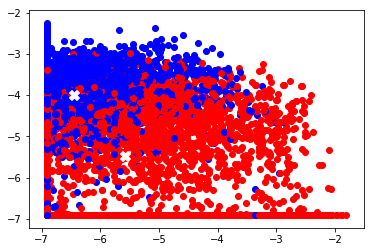

Homogeneity:  0.505891837486
Completeness:  0.506595279058
V-measure:  0.506243313908
Adjusted Rand-Index:  0.61311822321
Adjusted Mutual-Index:  0.505846601723
Contingency Matrix:  [[ 497 3406]
 [3621  358]]


In [40]:
log_nmf_matrix = np.log(0.001+nmf_tfidf)
k_means_nmf = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
k_means_nmf.fit(log_nmf_matrix)
plot_main(log_nmf_matrix, k_means_nmf)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means_nmf.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means_nmf.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means_nmf.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means_nmf.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means_nmf.labels_))
print('Contingency Matrix: ', confusion_matrix(labels, k_means_nmf.labels_))

#### Running log first and then normalizing the data

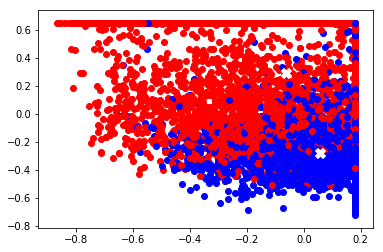

Homogeneity:  0.466101019428
Completeness:  0.466366307243
V-measure:  0.466233625598
Adjusted Rand-Index:  0.572481255597
Adjusted Mutual-Index:  0.466052140817
Contingency Matrix:  [[3384  519]
 [ 440 3539]]


In [41]:
x = np.log(0.001+nmf_tfidf)
normalized_x = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
k_means = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
k_means.fit(normalized_x)
plot_main(normalized_x, k_means)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))

#### Normalizing the data and the logging it. Added the min value to all points such that log does not return an error

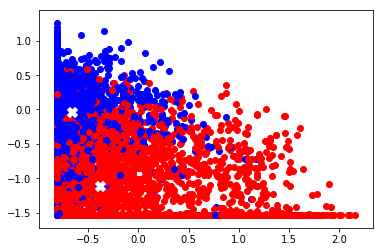

Homogeneity:  0.46486810155
Completeness:  0.465035993491
V-measure:  0.464952032365
Adjusted Rand-Index:  0.571329701944
Adjusted Mutual-Index:  0.464819110069
Contingency Matrix:  [[3393  510]
 [ 452 3527]]


In [42]:
x = nmf_tfidf
normalized_tfidf = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
logging_normalized_x = np.log(0.718657278385+normalized_tfidf)
k_means_nmf = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
k_means_nmf.fit(logging_normalized_x)
plot_main(logging_normalized_x, k_means_nmf)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means_nmf.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means_nmf.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means_nmf.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means_nmf.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means_nmf.labels_))
print('Contingency Matrix: ', confusion_matrix(labels, k_means_nmf.labels_))

## Part 5

In [20]:
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
dataset = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes'))
stop_words = text.ENGLISH_STOP_WORDS
labels = dataset.target[:]
count_vect = CountVectorizer(analyzer='word', min_df=3, stop_words=stop_words)
Data_counts = count_vect.fit_transform(dataset.data)
tfidf_transformer = TfidfTransformer()
Data_tfidf = tfidf_transformer.fit_transform(Data_counts)
print(Data_tfidf.shape)

(18846, 35684)


### 5.2

In [21]:
k_means = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=1)
r_values = [1, 2, 3, 5, 10, 20, 50, 100, 300]
homogeneity_svd = np.zeros(len(r_values))
completeness_svd = np.zeros(len(r_values))
v_measure_svd = np.zeros(len(r_values))
rand_index_svd = np.zeros(len(r_values))
mutual_index_svd = np.zeros(len(r_values))
print('SVD Computations Starting...')
index = 0
for i in r_values:
    svd = TruncatedSVD(n_components=i, random_state=42)
    trauncated_tfidf = svd.fit_transform(Data_tfidf)
    print("Number of components: %d" % i)
    k_means.fit(trauncated_tfidf)
    print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
    homogeneity_svd[index] = metrics.homogeneity_score(labels, k_means.labels_)
    print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
    completeness_svd[index] = metrics.completeness_score(labels, k_means.labels_)
    print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
    v_measure_svd[index] = metrics.v_measure_score(labels, k_means.labels_)
    print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
    rand_index_svd[index] = metrics.adjusted_rand_score(labels, k_means.labels_)
    print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
    mutual_index_svd[index] = metrics.adjusted_mutual_info_score(labels, k_means.labels_)
    print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))
    index += 1

SVD Computations Starting...
Number of components: 1
Homogeneity:  0.0152285258171
Completeness:  0.0165015459782
V-measure:  0.015839498919
Adjusted Rand-Index:  0.0030741944446
Adjusted Mutual-Index:  0.0120288829318
Contingency Matrix:  [[ 51  22  18  59  53  52   9  61  33  35  39  68   0  62  33  52  19  69
    8  56]
 [122  21  11  83  56  46   5  90  24  28  34  83   0  91  45  69  10  85
    2  68]
 [ 98  20  23  61  85  38   5 110  44  53  64  81   0  63  33  89   7  67
    1  43]
 [ 97  16  20  83  90  32   1 100  33  21  62  89   0  75  20 102  10  86
    0  45]
 [ 76  23  11  78  66  57   0 106  36  40  44  89   0  66  37  75   5  79
    3  72]
 [ 97  27  11 113  37  60   5  90  15  22  26  99   0  78  48  65   3 108
    5  79]
 [ 88  41   4 110  31  79   0  65  10  21  20  96   0 112  62  47   4  93
    1  91]
 [ 66  44   7  78  35  67   2  87  14  68  24  85   0  84  55  73   4 105
    1  91]
 [ 69  57   7  98  38  97   0  54  17  46  16  86   0 103  75  52   3  85
    0 

Number of components: 20
Homogeneity:  0.273509055148
Completeness:  0.335546663101
V-measure:  0.301368324877
Adjusted Rand-Index:  0.0692313714571
Adjusted Mutual-Index:  0.271144082457
Contingency Matrix:  [[  0 273   2   1 160 185   2   0   0  60  11   0   2   1  80   3  15   0
    0   4]
 [  0 204   3  45   0  75 194   0  29   0 130   0   0   0   0   0  64   4
   58 167]
 [ 17 210   1  49   1  51 130   0 290   0  56   0   0   0   2   0  34   1
   73  70]
 [185 163   4  14   0  40  17   0  44   0  87   0   4   3   0   0  49   1
  198 173]
 [ 99 209   1  13   0  61   8   0   5   0  81   0   0   1   0   0  67   1
  104 313]
 [  1 223   8 393   0  42  64   0  44   0  95   0   0   0   1   0  49   4
    7  57]
 [ 54 196   1   1   1  19   2   0  14   0  68   0  41  16   1   0  11  74
   43 433]
 [  3 368   1   3   3 111   1   0   0   0  37   0 391   0  20   0  28   2
    0  22]
 [ 12 451   0   2   5 223   0   0   0   0  35   0 213   2   8   0  26   0
    0  19]
 [  0 420   1   0   1 132 

##### Found that number of components for SVD is 10

In [22]:
print('NMF Computations Starting....')
homogeneity_nmf = np.zeros(len(r_values))
completeness_nmf = np.zeros(len(r_values))
v_measure_nmf = np.zeros(len(r_values))
rand_index_nmf = np.zeros(len(r_values))
mutual_index_nmf = np.zeros(len(r_values))
index = 0
r_values = [1, 2, 3, 5, 10, 20]
for i in r_values:
    nmf = NMF(n_components=i, init='random', random_state=42)
    nmf_tfidf = nmf.fit_transform(Data_tfidf)
    print("Number of components: %d" % i)
    k_means.fit(nmf_tfidf)
    print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
    homogeneity_nmf[index] = metrics.homogeneity_score(labels, k_means.labels_)
    print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
    completeness_nmf[index] = metrics.completeness_score(labels, k_means.labels_)
    print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
    v_measure_svd[index] = metrics.v_measure_score(labels, k_means.labels_)
    print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
    rand_index_nmf[index] = metrics.adjusted_rand_score(labels, k_means.labels_)
    print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))
    mutual_index_nmf[index] = metrics.adjusted_mutual_info_score(labels, k_means.labels_)
    print('Contingency Matrix: ', confusion_matrix(labels, k_means.labels_))
    index += 1

NMF Computations Starting....
Number of components: 1
Homogeneity:  0.0149631106606
Completeness:  0.0162705740201
V-measure:  0.015589476686
Adjusted Rand-Index:  0.00296341711587
Adjusted Mutual-Index:  0.0117611878923
Contingency Matrix:  [[ 82  24  11  47  29  56  57  67  36  52  19  34  60  58   0  61   8  40
   16  42]
 [ 91  24   3  64  19  57  98 106  29 111  10  30  73  81   0  71   5  49
   10  42]
 [ 77  22   1  84  37  35 100  60  54  98   9  47  94  68   0  62   5  40
   21  71]
 [102  16   0  89  32  35  97  69  21  98   8  53  86  85   0  69   4  28
   19  71]
 [ 94  25   3  62  32  57  92  75  40  91   4  38  78  82   0  70   1  52
   11  56]
 [104  32   5  38   9  67  80 114  22 106   4  22  84 113   0  75   5  58
   10  40]
 [109  49   1  35   7  87  71 117  21  86   4  17  53 108   0 115   0  65
    4  26]
 [ 92  49   1  53  13  73  74  80  68  85   4  18  75 106   0 103   2  61
    7  26]
 [ 91  64   0  40  13 103  60 106  46  76   3  16  53 102   0 101   0  86
    

Number of components: 20
Homogeneity:  0.235591121707
Completeness:  0.299244254408
V-measure:  0.263629867091
Adjusted Rand-Index:  0.0488873865205
Adjusted Mutual-Index:  0.23310041305
Contingency Matrix:  [[ 18 130 312   0   0 120   0   0   0 109   2  79   4   1   2   2   9   3
    8   0]
 [ 55  78 293  54   0   7   0   1   0   0   2  30 259  14   0  19   0   0
  134  27]
 [ 35  64 256  68   0  12   0   1  21   0   1  26 115  28   0  13   0   0
   68 277]
 [ 40  79 274 187   3   3   0   1 190   0   4  11  19   6   2  31   1   0
   97  34]
 [ 72 100 390 125   1   7   0   1 108   0   1  22  12   2   0  21   0   0
   97   4]
 [ 48  46 291  10   1   8   0   2   1   0   8  13  87 307   0  16   0   0
  104  46]
 [ 13  42 222  51  22   9   0  51  60   0   1   7   3   1  27 394   0   0
   60  12]
 [ 27 118 423   0   0  23   0   1   3   0   1  22   1   3 315  13   1   0
   39   0]
 [ 30 181 569   0   2  21   0   0  13   0   0  40   2   2  78  21   1   0
   36   0]
 [ 24 136 394   0 322   8  

##### found number of components is optimal at 10 for NMF

### Non linear Logarithmic transformation

In [23]:
nmf = NMF(n_components=10, init='random', random_state=42)
nmf_tfidf = nmf.fit_transform(Data_tfidf)
log_nmf_matrix = np.log(0.001+nmf_tfidf)
k_means_nmf = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
k_means_nmf.fit(log_nmf_matrix)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means_nmf.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means_nmf.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means_nmf.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means_nmf.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means_nmf.labels_))

Homogeneity:  0.312239713276
Completeness:  0.317535130799
V-measure:  0.314865158965
Adjusted Rand-Index:  0.168451619907
Adjusted Mutual-Index:  0.3100197085


### Normalize the SVD Data

In [24]:
svd = TruncatedSVD(n_components=10, random_state=42, n_iter=13)
x = svd.fit_transform(Data_tfidf)
normalized_x = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
k_means = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
k_means.fit(normalized_x)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))

Homogeneity:  0.281055381634
Completeness:  0.334610474775
V-measure:  0.305503622485
Adjusted Rand-Index:  0.0803854920898
Adjusted Mutual-Index:  0.278715526661


#### Running log first and then normalizing the data

In [25]:
x = np.log(0.001+nmf_tfidf)
normalized_x = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
k_means = KMeans(n_clusters=20, init='k-means++', max_iter=300, n_init=10)
k_means.fit(normalized_x)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means.labels_))

Homogeneity:  0.310383170087
Completeness:  0.315808629621
V-measure:  0.313072396184
Adjusted Rand-Index:  0.151658756069
Adjusted Mutual-Index:  0.308157119999


#### Normalizing the data and the logging it. Added the min value to all points such that log does not return an error

In [26]:
x = nmf_tfidf
normalized_tfidf = (x-x.mean(axis=0, keepdims=True))/(x.std(axis=0, keepdims=True) + x.mean(axis=0, keepdims=True))
logging_normalized_x = np.log(0.718657278385+normalized_tfidf)
k_means_nmf = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
k_means_nmf.fit(logging_normalized_x)

print('Homogeneity: ', metrics.homogeneity_score(labels, k_means_nmf.labels_))
print('Completeness: ', metrics.completeness_score(labels, k_means_nmf.labels_))
print('V-measure: ', metrics.v_measure_score(labels, k_means_nmf.labels_))
print('Adjusted Rand-Index: ', metrics.adjusted_rand_score(labels, k_means_nmf.labels_))
print('Adjusted Mutual-Index: ', metrics.adjusted_mutual_info_score(labels, k_means_nmf.labels_))

Homogeneity:  0.057676261021
Completeness:  0.25036945454
V-measure:  0.0937547466643
Adjusted Rand-Index:  0.0309288799046
Adjusted Mutual-Index:  0.057517290138
